In [1]:
import pandas as pd
import numpy as np
from kiwipiepy import Kiwi
import copy
import re
from kiwipiepy.utils import Stopwords
import nltk

from wordcloud import WordCloud # 워드클라우드 제작 라이브러리
import pandas as pd # 데이터 프레임 라이브러리
import numpy as np # 행렬 라이브러리
import matplotlib.pyplot as plt # 워드클라우드 시각화 라이브러리
%matplotlib inline
import konlpy

C:\Users\cutad\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_2000 = pd.read_csv('유행어_전처리데이터/2000유행어_전처리.csv', encoding='utf-8')
df_2020 = pd.read_csv('유행어_전처리데이터/20유행어_전처리.csv', encoding='utf-8')
df_2021 = pd.read_csv('유행어_전처리데이터/21유행어_전처리.csv', encoding='utf-8')
df_2022 = pd.read_csv('유행어_전처리데이터/22유행어_전처리.csv', encoding='utf-8')
df_2023 = pd.read_csv('유행어_전처리데이터/23유행어_전처리.csv', encoding='utf-8')
df_2024 = pd.read_csv('유행어_전처리데이터/24유행어_전처리.csv', encoding='utf-8')

In [3]:
combined_df = pd.concat([df_2000, df_2020, df_2021, df_2022, df_2023, df_2024], ignore_index=True)
combined_df.shape

(5629, 7)

## 1.유행어만 살리기

In [4]:
df = [df_2000, df_2020, df_2021, df_2022, df_2023, df_2024]

In [5]:
# 유행어 텍스트 파일에서 유행어 읽기
def load_inwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        inwords_list = file.read().splitlines()
    return inwords_list

# 파일에서 유행어 목록 로드
inwords_file_path = '../new.txt'
file_inwords = load_inwords(inwords_file_path)

# 유행어 리스트 중복 삭제
all_inwords = list(set(file_inwords))

In [6]:
len(all_inwords)

241

In [7]:
# 단어 빈도 계산 및 상위 단어 추출 
def explode_and_count(df, column):
    exploded = df[column].str.split().explode()  # 문자열을 단어 단위로 나누어 행으로 펼침
    word_counts = exploded.value_counts().reset_index()  # 단어 빈도 계산
    word_counts.columns = ['word', 'count']  # 컬럼명 설정
    return word_counts

In [8]:
## df_2000

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2000 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2000, column)
    word_counts_list_2000.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2000 = pd.concat(word_counts_list_2000).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2000 = all_words_body_2000[all_words_body_2000['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2000 = all_words_body_2000[all_words_body_2000['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2000 = all_words_body_2000.head(10)
top_10_words_2000

,word,count
8077,문제,581
308,감성,163
15530,엄마,140
18679,이제,123
16660,오타쿠,96
7031,만남,60
13835,신뢰,55
3763,낭만,52
2223,궁금,52
5402,동료,48


In [11]:
## df_2020

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2020 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2020, column)
    word_counts_list_2020.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2020 = pd.concat(word_counts_list_2020).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2020 = all_words_body_2020[all_words_body_2020['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2020 = all_words_body_2020[all_words_body_2020['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2020 = all_words_body_2020.head(10)
top_10_words_2020

,word,count
8537,문제,372
331,감성,73
2259,궁금,65
5636,동료,61
28056,한강,54
7419,만남,51
1335,고양이,45
4484,뉴진스,38
15368,아이스,36
24168,축복,34


In [14]:
## df_2021

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2021 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2021, column)
    word_counts_list_2021.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2021 = pd.concat(word_counts_list_2021).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2021 = all_words_body_2021[all_words_body_2021['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2021 = all_words_body_2021[all_words_body_2021['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2021 = all_words_body_2021.head(10)
top_10_words_2021

,word,count
8273,문제,404
23805,커피,164
18995,이제,116
2331,궁금,81
8162,무야호,79
335,감성,71
13442,스불재,51
1390,고양이,42
5522,동료,42
10327,부캐,41


In [15]:
## df_2022

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2022 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2022, column)
    word_counts_list_2022.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2022 = pd.concat(word_counts_list_2022).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2022 = all_words_body_2022[all_words_body_2022['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2022 = all_words_body_2022[all_words_body_2022['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2022 = all_words_body_2022.head(10)
top_10_words_2022

,word,count
8636,문제,393
352,감성,108
5759,동료,94
1420,고양이,89
2368,궁금,80
22197,중꺾마,61
7506,만남,53
20553,잡채,53
3974,낭만,51
14615,신뢰,48


In [16]:
## df_2023

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2023 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2023, column)
    word_counts_list_2023.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2023 = pd.concat(word_counts_list_2023).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2023 = all_words_body_2023[all_words_body_2023['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2023 = all_words_body_2023[all_words_body_2023['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2023 = all_words_body_2023.head(10)
top_10_words_2023

,word,count
20479,엄마,671
10865,문제,595
24456,이제,155
1754,고양이,134
447,감성,113
18317,신뢰,101
2918,궁금,98
7167,동료,91
9444,만남,86
29740,축복,69


In [17]:
## df_2024

# 각 칼럼에 대해 단어 빈도 계산
word_counts_list_2024 = []

for column in ['preprocessed_body']:
    word_counts = explode_and_count(df_2024, column)
    word_counts_list_2024.append(word_counts)

# 모든 칼럼의 단어 빈도 합산 및 정렬
all_words_body_2024 = pd.concat(word_counts_list_2024).groupby('word').sum().reset_index().sort_values(by='count', ascending=False)

# 한 글자 단어 제외
all_words_body_2024 = all_words_body_2024[all_words_body_2024['word'].str.len() > 1]

# all_inwords 리스트에 있는 단어들만 필터링
all_words_body_2024 = all_words_body_2024[all_words_body_2024['word'].isin(all_inwords)]

# 상위 10개 단어 출력
top_10_words_2024 = all_words_body_2024.head(10)
top_10_words_2024

,word,count
11165,문제,657
21226,엄마,542
25516,이제,165
1782,고양이,145
435,감성,144
9646,만남,137
7302,동료,106
31054,축복,102
18947,신뢰,100
2995,궁금,100


## 2. 워드 클라우드

참고 사이트: https://serendipity77.tistory.com/entry/영화동감-영화동감-댓글-리뷰-워드-클라우드wordcloud로-만들어보기파이썬-Python 

[엑셀 자동화로 칼퇴하는 김대리의 고군분투기:티스토리]

In [13]:
font_path='C:\\Windows\\Fonts\\malgun.ttf'

### df_2000

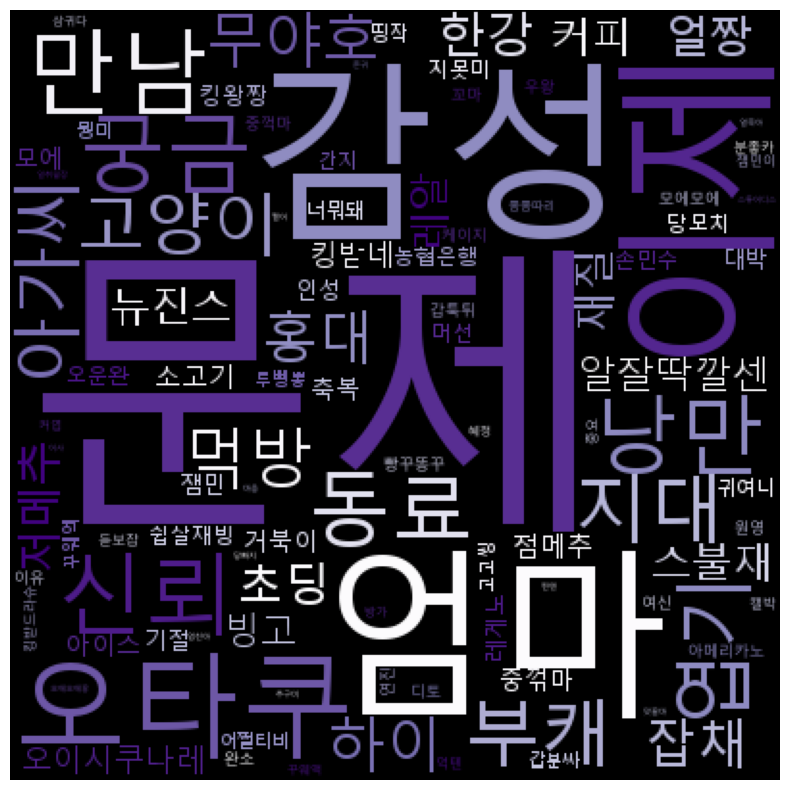

In [14]:
dic_word = all_words_body_2000.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'Purples')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBr': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

#### 꾸미기

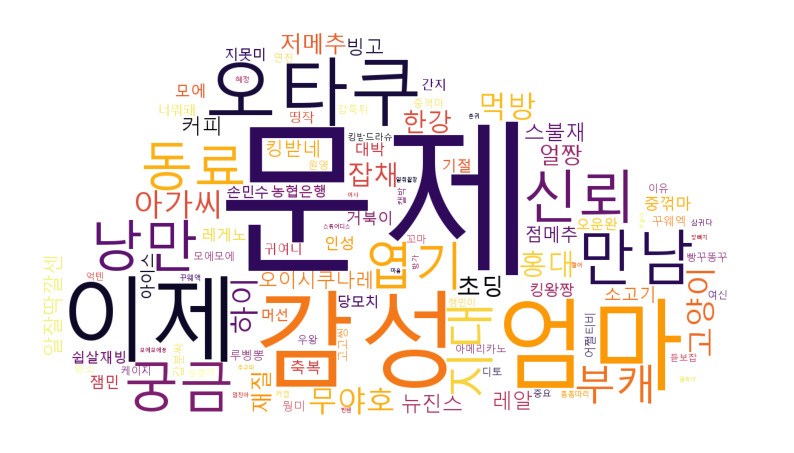

In [19]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장

### df_2020

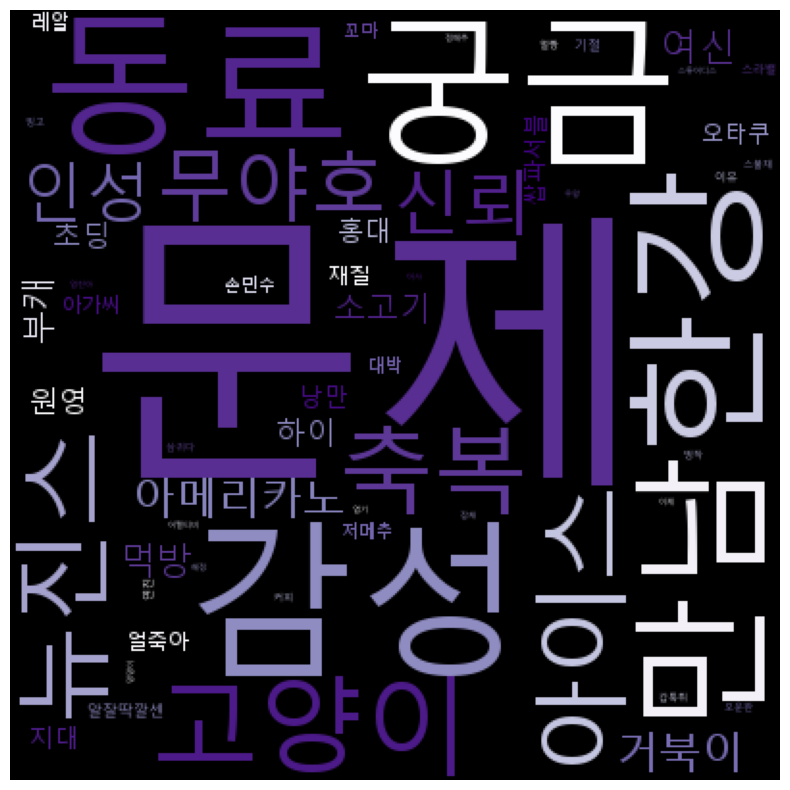

In [20]:
dic_word = all_words_body_2020.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'Purples')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

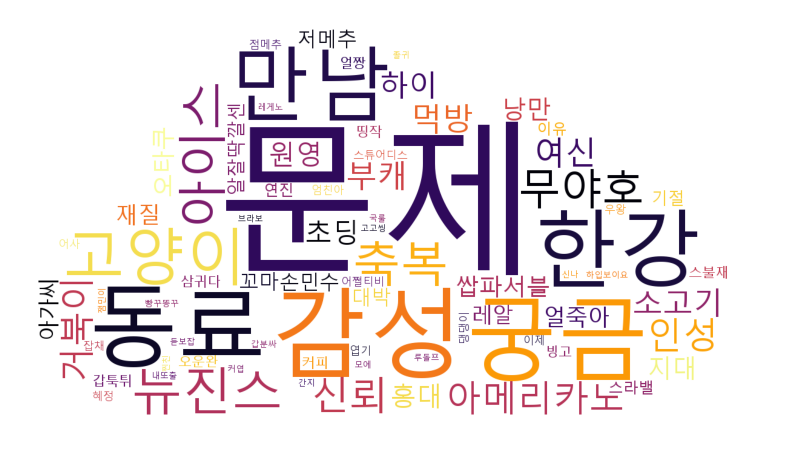

In [21]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장

### df_2021

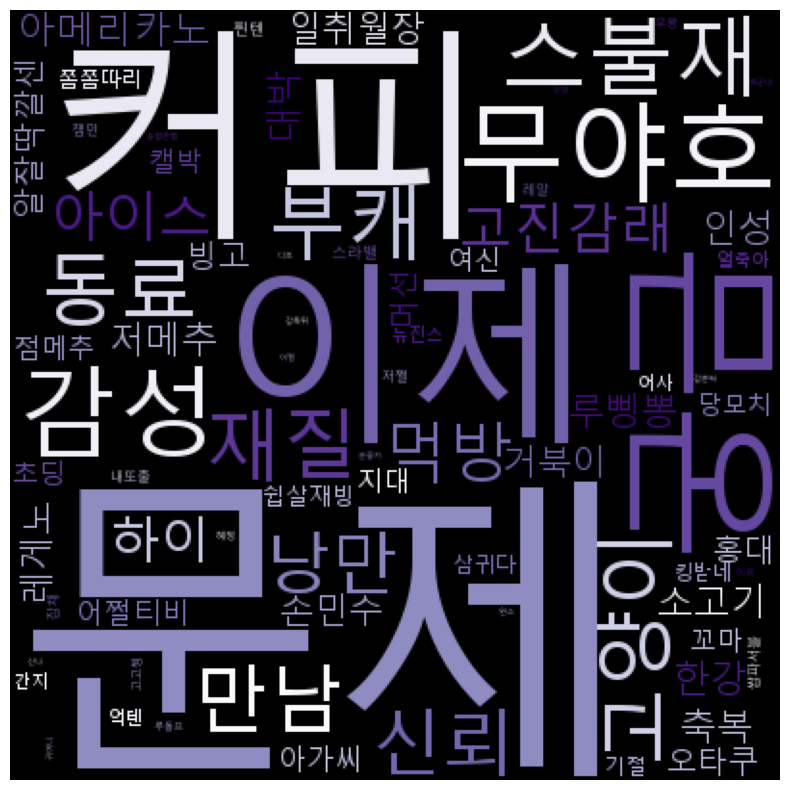

In [22]:
dic_word = all_words_body_2021.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'Purples')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

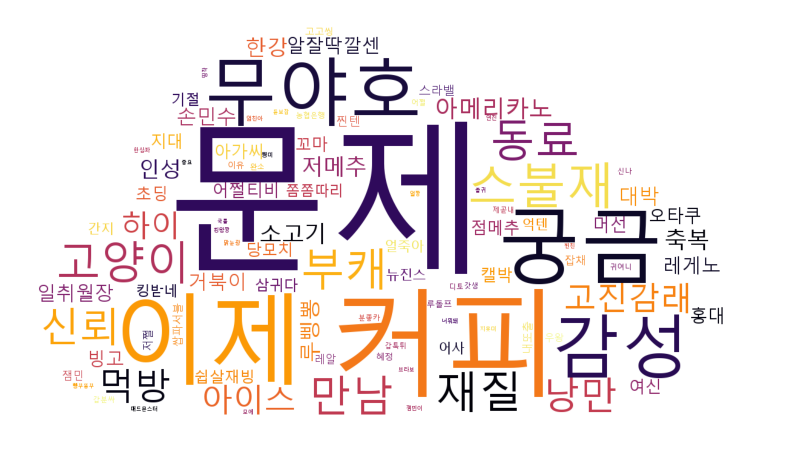

In [23]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장

### df_2022

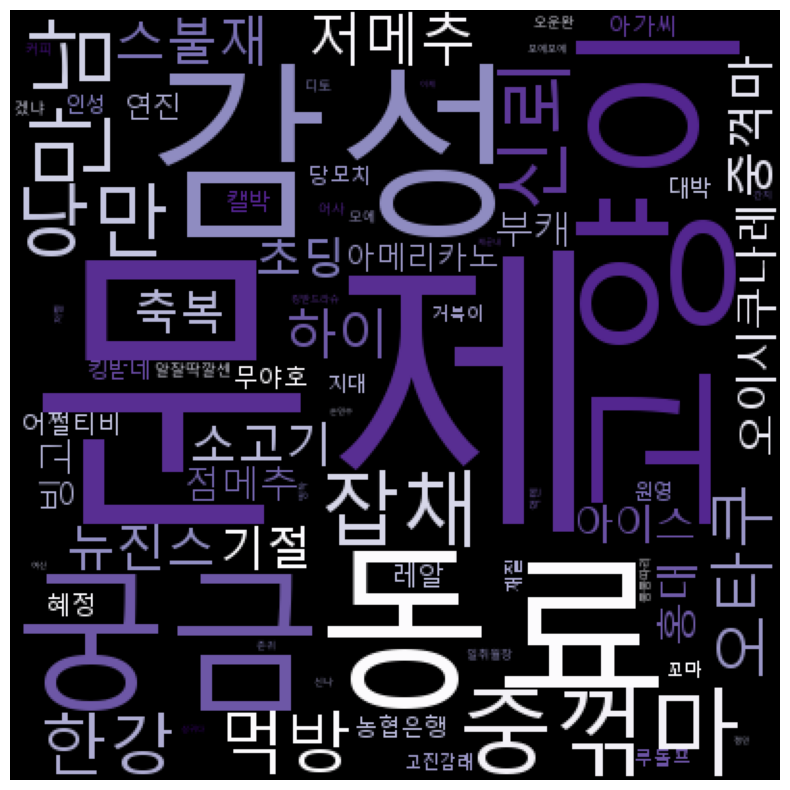

In [25]:
dic_word = all_words_body_2022.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'Purples')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

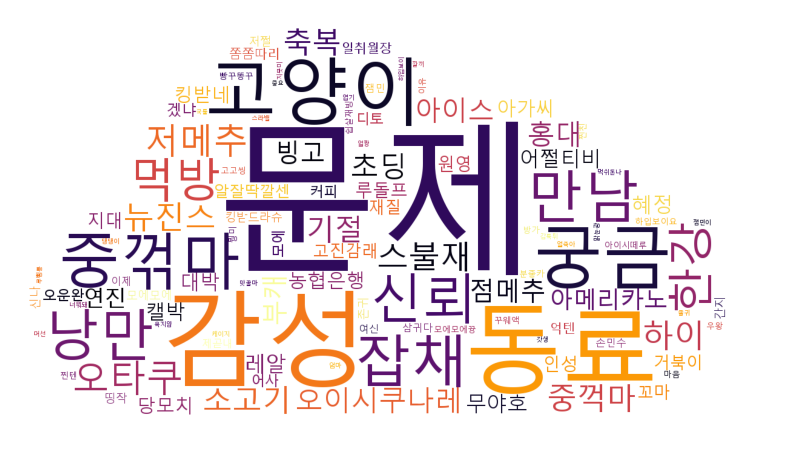

In [26]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장

### df_2023

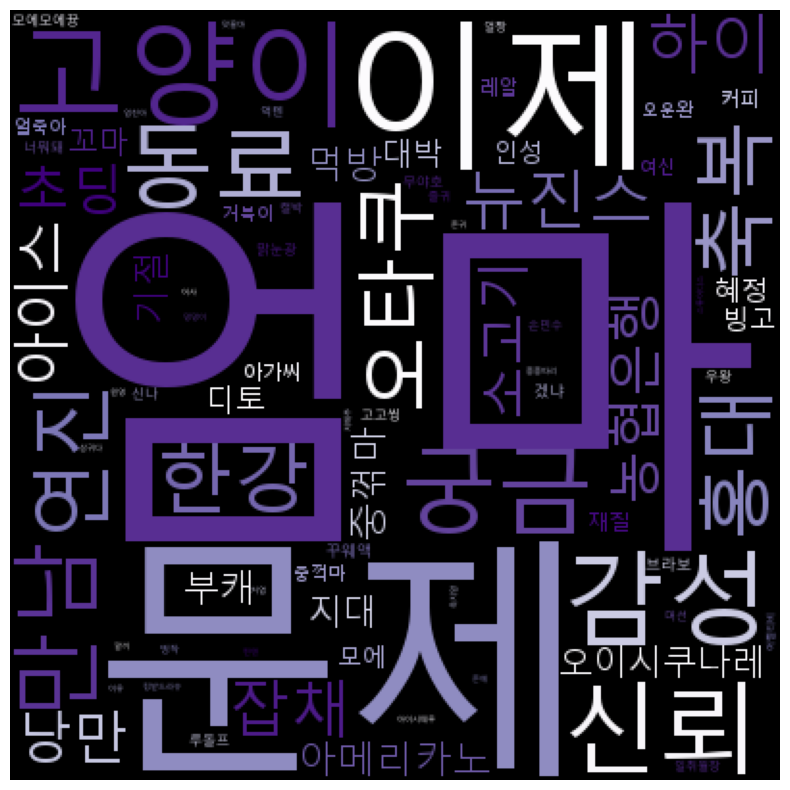

In [27]:
dic_word = all_words_body_2023.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'Purples')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

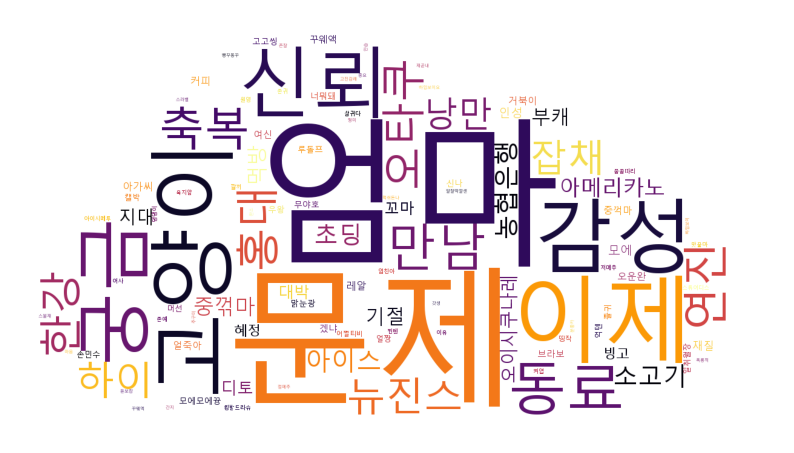

In [28]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장

### df_2024

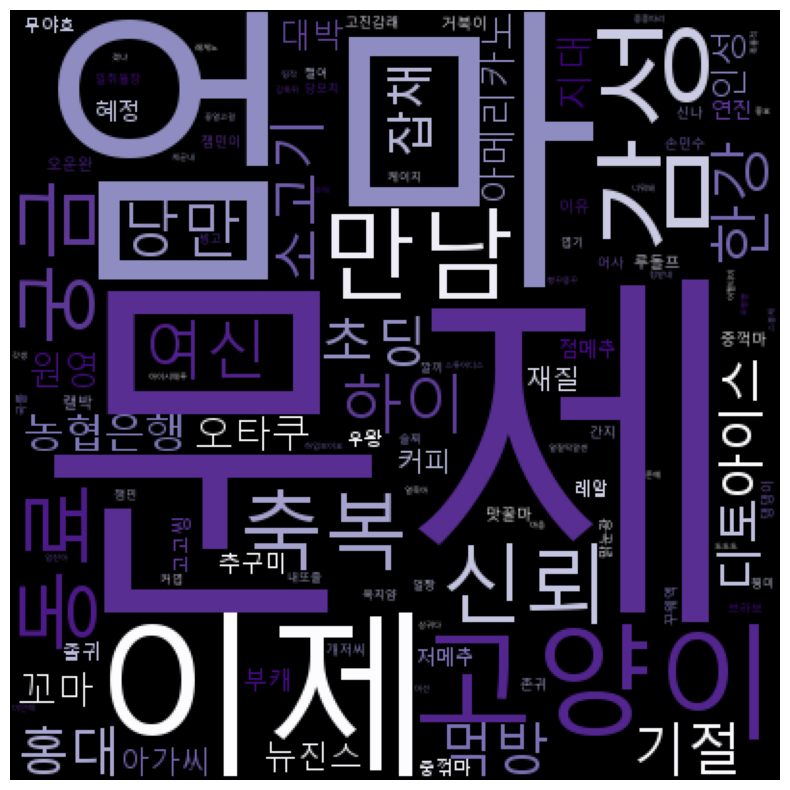

In [29]:
dic_word = all_words_body_2024.set_index('word').to_dict()['count']
## colormap 참고 사이트: https://wonhwa.tistory.com/20

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'black',
               colormap = 'Purples')
               ## 'Blues': 파란색 그라데이션
               ## 'BuGn': 청록색
               ## 'BuPu': 진보라 ~ 연한 파란색 ~ 하얀색 
               ## 'GnBu': 진파랑 ~ 연한 초록색 ~ 하얀색
               ## 'Greys': 검은색 ~ 회색 ~ 하얀색
               ## 'OrRd': 진빨강 ~ 연한 오렌지 ~ 하얀색
               ## 'Pastel1': 파스텔 색
               ## 'Pastel2': 파스텔 색
               ## 'PuBu': 진파랑 ~ 핑크 ~ 하얀색
               ## 'PuRd': 자주 ~ 핑크 ~ 하얀색
               ## 'Purples': 보라색
               ## 'RdPu': 보라 ~ 자주 ~ 핑크
               ## 'Reds': 빨강
               ## 'Wistia': 주황 ~ 형광 노랑
               ## 'YlGnBu': 파랑 ~ 초록 ~ 노랑


img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
## plt.savefig('동감_워드클라우드') # 파일 저장

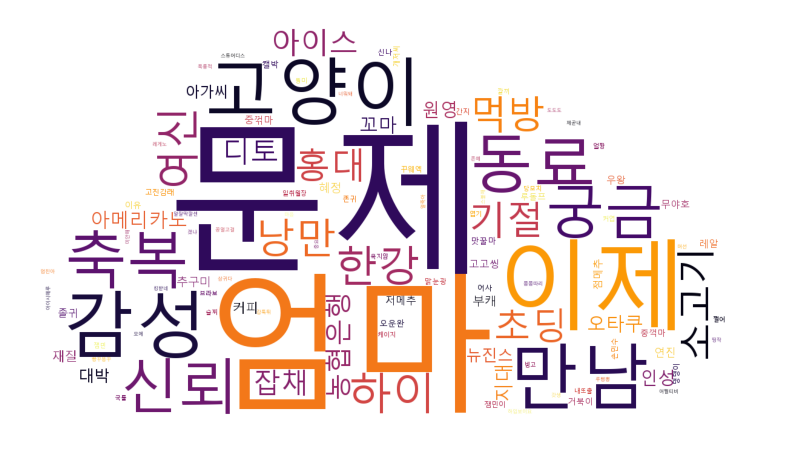

In [30]:
import PIL
icon = PIL.Image.open('../cloud.png')

img = PIL.Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, (0,0))
img = np.array(img)

wc = WordCloud(random_state = 123, font_path = font_path, width = 400,
               height = 400, background_color = 'white', 
               mask = img, colormap = 'inferno')

img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10)) # 크기 지정하기
plt.axis('off') # 축 없애기
plt.imshow(img_wordcloud) # 결과 보여주기
# plt.savefig('동감_워드클라우드_꾸밈') # 파일 저장